## Классификация

### Логистическая регрессия

##### Без встроенных инструментов.

In [ ]:
import sklearn as sk
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

Классифицируем рандомный набор точек.

In [ ]:
X,Y = sk.datasets.make_classification(
    n_samples=1000,n_features=2,random_state=13,
    n_informative=2,n_redundant=0,
    class_sep=2,n_clusters_per_class=1,flip_y=0)
X.shape, Y.shape

((1000, 2), (1000,))

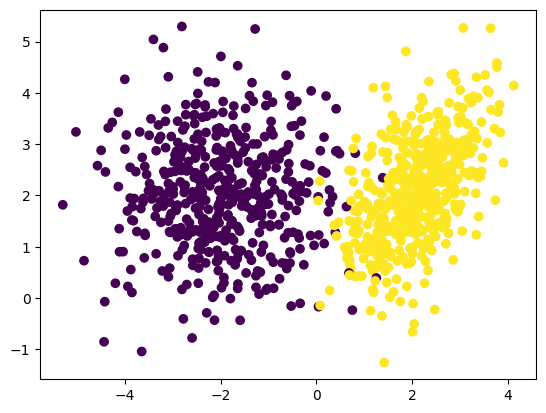

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)

Сигмоид как передаточная дифференцируемая функция.

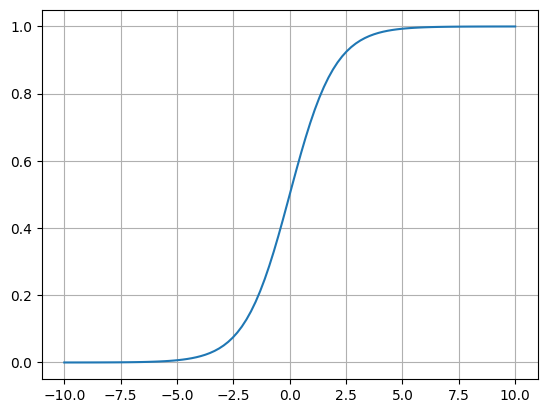

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-10,10,100)
plt.plot(x,sigmoid(x))
plt.grid()

In [ ]:
W = np.random.normal(size=(2,)) #weights
b = np.random.normal(size=(1,)) #bias

def mse_loss(W,b):
  return np.average(np.square(sigmoid(np.matmul(X,W)+b)-Y))

def log_loss(W,b):
    z = sigmoid(np.matmul(X,W)+b) # вероятность 1 класса
    return (-Y * np.log(z) - (1 - Y) * np.log(1 - z)).mean()

mse_loss(W,b), log_loss(W,b)

(0.14393228692984833, 0.4697795731510399)

In [ ]:
def d(f,x,dx=0.1):
    n = x.shape[0]
    r = np.zeros_like(x)
    for i in range(n):
        dxc = np.eye(n)[i]*dx
        r[i] = (f(x+dxc)-f(x))/dx
    return r

d(lambda x: mse_loss(x,b),W)

array([-0.26819648,  0.10171284])

In [ ]:
#loss=mse_loss
loss=log_loss

eta = 0.5
n = len(X)
for i in range(20):
    print(f"({W} {b}) -> loss={loss(W,b)}")
    dldw = d(lambda x: loss(x,b),W)
    dldb = d(lambda x: loss(W,x),b)
    #h = sigmoid(np.matmul(X,W)+b)
    W-=eta*dldw
    b-=eta*dldb

([0.27565873 0.25443083] [-0.42798751]) -> loss=0.4697795731510399
([0.58808797 0.16920701] [-0.44614339]) -> loss=0.2982713377719571
([0.77415545 0.13368127] [-0.44628314]) -> loss=0.23294939411261897
([0.9100257  0.11023871] [-0.44358486]) -> loss=0.196772258816098
([1.01822541 0.0916437 ] [-0.44042834]) -> loss=0.17330259337006657
([1.10869525 0.07567099] [-0.43734472]) -> loss=0.15664485110769374
([1.18675781 0.06138983] [-0.43446435]) -> loss=0.14410842122225598
([1.2556147  0.04832606] [-0.43180799]) -> loss=0.1342750553820145
([1.31734954 0.03620285] [-0.42936387]) -> loss=0.12632048553874778
([1.37339818 0.02484192] [-0.42711155]) -> loss=0.11973033962743466
([1.42479409 0.01411977] [-0.4250297]) -> loss=0.11416570763685055
([1.4723071  0.00394602] [-0.42309873]) -> loss=0.10939348714491068
([ 1.5165268  -0.00574831] [-0.42130139]) -> loss=0.10524766317754006
([ 1.55791521 -0.01501764] [-0.41962281]) -> loss=0.10160653651178606
([ 1.59684143 -0.02390602] [-0.4180502]) -> loss=0

(-2.0, 6.0)

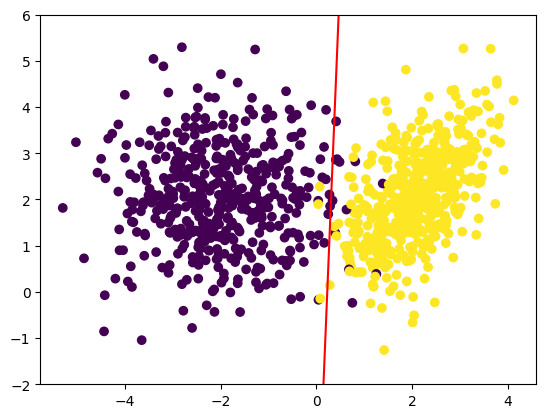

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)
x = np.array([-3,3])
# y = sigmoid(w0x0+w1x1+b) => w0x0+w1x1+b = 0 => x1 = (-b-w0x0)/w1
plt.plot(x,(-b-W[0]*x)/W[1],c='r')
plt.ylim((-2,6))

##### Встроенные инструменты

In [ ]:
import sklearn.linear_model
model = sk.linear_model.LogisticRegression()
model.fit(X,Y)

LogisticRegression()

(-2.0, 6.0)

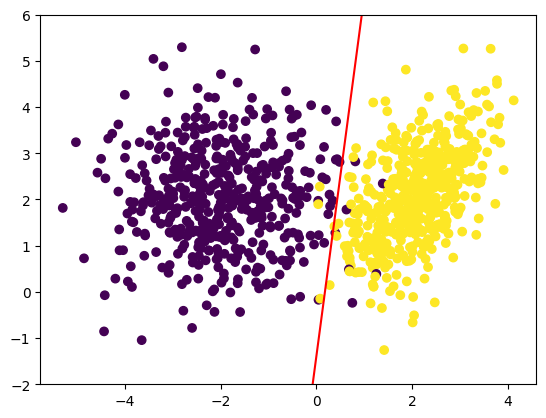

In [ ]:
W = model.coef_[0]
b = model.intercept_[0]
plt.scatter(X[:,0],X[:,1],c=Y)
x = np.array([-3,3])
# y = sigmoid(w0x0+w1x1+b) => w0x0+w1x1+b = 0 => x1 = (-b-w0x0)/w1
plt.plot(x,(-b-W[0]*x)/W[1],c='r')
plt.ylim((-2,6))

In [ ]:
model.predict([[3.5,-0.5],[-1.0,-1.0]])

array([1, 0])

Вероятности каждого класса

In [ ]:
model.predict_proba([[3.5,-0.5],[-1.0,-1.0]])

array([[1.36928513e-06, 9.99998631e-01],
       [9.85180171e-01, 1.48198290e-02]])

## Бинарная классификация - Titanic

In [ ]:
import pandas as pd
df = pd.read_csv("http://www.soshnikov.com/permanent/data/titanic.zip")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
sex_dict = { 'male' : 0, 'female' : 1 }
df['nsex'] = df['sex'].apply(lambda x: sex_dict[x])

Пассажирам, имеющим неизвестный возраст, присваиваем средний возраст.

In [ ]:
df['age'].isna().sum()

263

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())
df['sqage'] = df['age'].apply(lambda x: x*x/2000.)

In [ ]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,nsex,sqage
0,1,1,Allen. Miss. Elisabeth Walton,female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO,1,0.420500
1,1,1,Allison. Master. Hudson Trevor,male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON,0,0.000420
2,1,0,Allison. Miss. Helen Loraine,female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,1,0.002000
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON,0,0.450000
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON,1,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0.105125
1305,3,0,Zabour. Miss. Thamine,female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0.446441
1306,3,0,Zakarian. Mr. Mapriededer,male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,0.351125
1307,3,0,Zakarian. Mr. Ortin,male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0.364500


Выберем параметры, влияющие на выживаемость.

In [ ]:
features = ['pclass','nsex','age','sibsp','parch']
X = df[features]
Y = df['survived']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y,test_size=0.2,shuffle=True,stratify=Y )
# равномерное распределение данных относительно целевого класса

Убедимся, что данные разбиты в равных пропорциях относительно целевого класса.

In [ ]:
Y_train.mean(), Y_test.mean()

(0.38204393505253104, 0.3816793893129771)

In [ ]:
model = sk.linear_model.LogisticRegression().fit(X_train,Y_train)

In [ ]:
Y_pred = model.predict(X_test)
print(f"Predict all dead: {sk.metrics.accuracy_score(Y_test,np.zeros_like(Y_test))}")
print(f"Our model: {sk.metrics.accuracy_score(Y_test,Y_pred)}")

Predict all dead: 0.6183206106870229
Our model: 0.7900763358778626


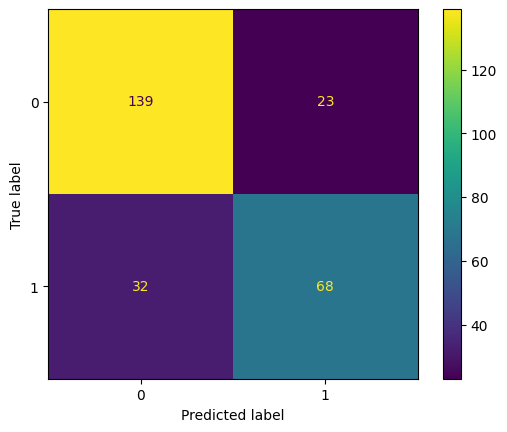

In [ ]:
sk.metrics.ConfusionMatrixDisplay.from_estimator(model,X_test,Y_test)
plt.show()

In [ ]:
print(sk.metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       162
           1       0.75      0.68      0.71       100

    accuracy                           0.79       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.79      0.79      0.79       262



In [ ]:
list(zip(features,model.coef_[0]))

[('pclass', -1.037110383960404),
 ('nsex', 2.491329924980452),
 ('age', -0.036653085158797644),
 ('sibsp', -0.24105831412956644),
 ('parch', -0.01378144083616585)]

Полиномеальная регрессия.

In [ ]:
tr = sk.preprocessing.PolynomialFeatures()
Xp_train = tr.fit_transform(X_train)
Xp_test = tr.transform(X_test)
X_test.shape,Xp_test.shape

((262, 5), (262, 21))

In [ ]:
pmodel = sk.linear_model.LogisticRegression().fit(Xp_train,Y_train)
Y_pred = pmodel.predict(Xp_test)
print(f"Our model: {sk.metrics.accuracy_score(Y_test,Y_pred)}")

Our model: 0.8053435114503816


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Масштабируем данные и объединяем действия в цепочку.

In [ ]:
import sklearn.pipeline
pipe = sk.pipeline.Pipeline([
    ('Scaler',sk.preprocessing.StandardScaler()),
    ('PolyTransformer',sk.preprocessing.PolynomialFeatures()),
    ('LinearModel',sk.linear_model.LogisticRegression())
])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print(f"Our model: {sk.metrics.accuracy_score(Y_test,Y_pred)}")

Our model: 0.8091603053435115


## Деревья решений

Требуются дискретные значения.

In [ ]:
df['agecat'] = df['age'].apply(lambda x:
                              "young" if x<18
                               else "old" if x>45
                               else "middle")

Посмотрим какая будет точность, если предсказывать по параметру "пол".

In [ ]:
for s in ['male','female']:
  print(f"{s} -> {df[df['sex']==s]['survived'].mean()}")

male -> 0.19098457888493475
female -> 0.7274678111587983


In [ ]:
def accuracy_by_attr(df,attr):
    p = {}
    for k in df[attr].unique():
        p[k] = int(df[df[attr]==k]['survived'].mean()>=0.5)
    return df.apply(lambda x: p[x[attr]]==x['survived'],axis=1).mean()

accuracy_by_attr(df,'sex')

0.7799847211611918

In [ ]:
for a in ['pclass','sex','agecat']:
  print(f"{a} -> {accuracy_by_attr(df,a)}")

pclass -> 0.6768525592055004
sex -> 0.7799847211611918
agecat -> 0.6241405653170359


Точности по оставшимся атрибутам- после определения пола для женщин определяем класс, для мужчин не имеет значения.

In [ ]:
dfm = df[df['sex']=='female']
for a in ['pclass','agecat']:
  print(f"{a} -> {accuracy_by_attr(dfm,a)}")

pclass -> 0.7360515021459227
agecat -> 0.7274678111587983


In [ ]:
dfm = df[df['sex']=='male']
for a in ['pclass','agecat']:
  print(f"{a} -> {accuracy_by_attr(dfm,a)}")

pclass -> 0.8090154211150652
agecat -> 0.8090154211150652


In [ ]:
import sklearn.tree
model = sk.tree.DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(f"Our model: {sk.metrics.accuracy_score(Y_test,Y_pred)}")

Our model: 0.7748091603053435


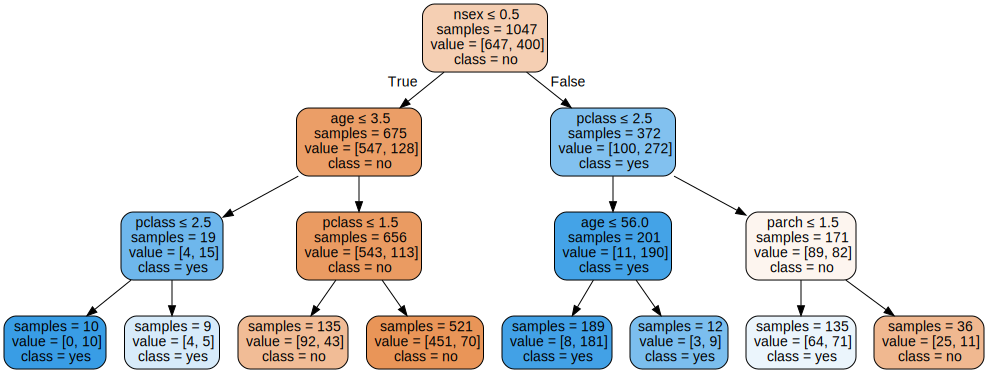

In [ ]:
import graphviz

graphviz.Source(
    sk.tree.export_graphviz(model,feature_names=features,class_names=['no','yes'],
    filled=True, rounded=True, special_characters=True,impurity=False)
)

## SVM

In [ ]:
X,Y = sk.datasets.make_classification(
    n_samples=1000,n_features=2,random_state=13,
    n_informative=2,n_redundant=0,
    class_sep=3,n_clusters_per_class=1,flip_y=0)

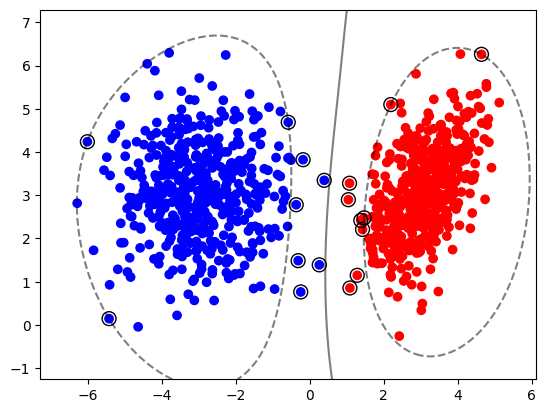

In [ ]:
import sklearn.svm, sklearn.inspection

model = sk.svm.SVC()
model.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])

ax = plt.gca()
# строим разделяющие прямые
sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,
    linestyles=["--", "-", "--"], ax=ax)
# обводим опорные вектора
ax.scatter(
    model.support_vectors_[:, 0], model.support_vectors_[:, 1],
    s=100, linewidth=1, facecolors="none", edgecolors="k")

plt.show()

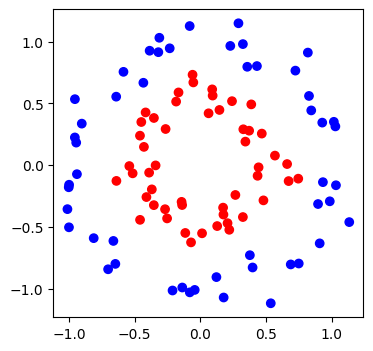

In [ ]:
X,Y = sk.datasets.make_circles(n_samples=100,factor=0.5,noise=0.1)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])
plt.show()

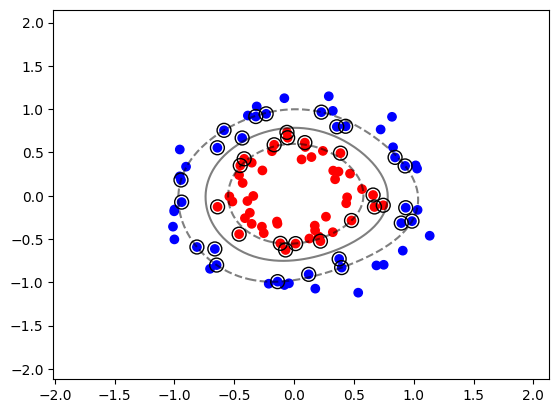

In [ ]:
model = sk.svm.SVC()
model.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])

ax = plt.gca()
# строим разделяющие прямые
sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,
    linestyles=["--", "-", "--"], ax=ax)
# обводим опорные вектора
ax.scatter(
    model.support_vectors_[:, 0], model.support_vectors_[:, 1],
    s=100, linewidth=1, facecolors="none", edgecolors="k")

plt.show()

Сравним логистическую, полиномеальную регрессию и SVM.

In [ ]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y,test_size=0.2,shuffle=True)

linmodel = sk.linear_model.LogisticRegression().fit(X_train,Y_train)
polymodel = sk.pipeline.Pipeline([
    ('PolyFeatures',sk.preprocessing.PolynomialFeatures()),
    ('LogReg',sk.linear_model.LogisticRegression())
])
polymodel.fit(X_train,Y_train)

print(f"Linear accuracy = {sk.metrics.accuracy_score(Y_test,linmodel.predict(X_test))}")
print(f"Non-lin SVM accuracy = {sk.metrics.accuracy_score(Y_test,model.predict(X_test))}")
print(f"Poly accuracy = {sk.metrics.accuracy_score(Y_test,polymodel.predict(X_test))}")

Linear accuracy = 0.5
Non-lin SVM accuracy = 1.0
Poly accuracy = 1.0


## Многоклассовая классификация - рукописные цифры.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X = mnist.data
Y = mnist.target
print(X.shape, Y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


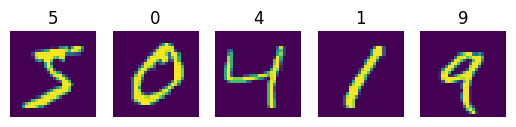

In [ ]:
fig,ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(X.iloc[i].to_numpy().reshape(28,28))
    ax[i].axis('off')
    ax[i].set_title(Y[i])
plt.show()

In [ ]:
Y = Y.apply(int)

In [ ]:
X_train, X_test, Y_train, Y_test = \
  sk.model_selection.train_test_split(X,Y,train_size=10000, test_size=5000, stratify=Y)

Пример приведения к бинарной классификации - ноль или не ноль.

In [ ]:
Y0_train = Y_train == 0
Y0_test = Y_test == 0
model0 = sk.linear_model.LogisticRegression(solver='newton-cg').fit(X_train/255.0,Y0_train)
print(sk.metrics.accuracy_score(Y0_test,model0.predict(X_test/255.0)))
print(sk.metrics.accuracy_score(Y0_test,np.zeros_like(Y0_test)))# всегда не ноль

0.9912
0.9014


Объединение десяти бинарных классификаторов в один.

In [ ]:
import sklearn.multiclass

model = sk.multiclass.OneVsRestClassifier(
    sk.linear_model.LogisticRegression(solver='newton-cg',tol=0.1))
model.fit(X_train/255.0, Y_train)
sk.metrics.accuracy_score(Y_test,model.predict(X_test/255.0))

0.896

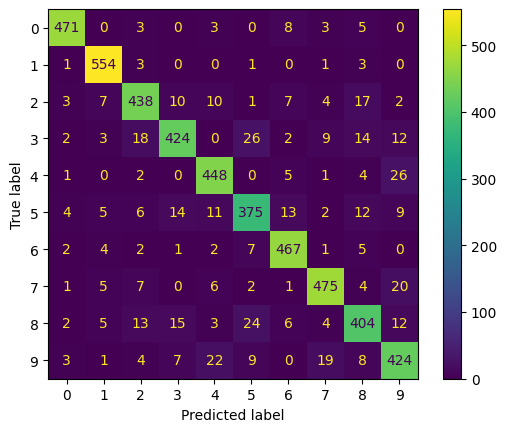

In [ ]:
sk.metrics.ConfusionMatrixDisplay.from_estimator(model,X_test/255.0,Y_test)
plt.show()

Линейная регрессия может работать сразу с многими классами.

0.8976


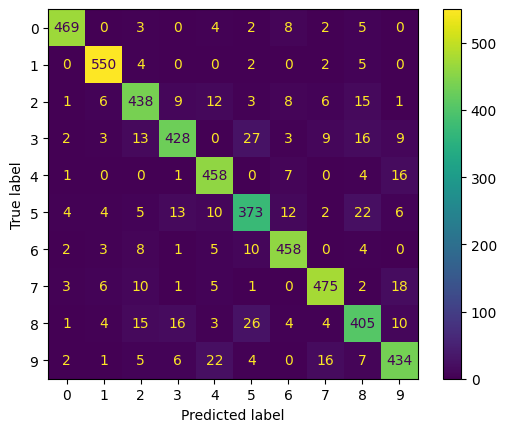

In [ ]:
model = sk.linear_model.LogisticRegression(solver='newton-cg',tol=0.1)
model.fit(X_train/255.0, Y_train)
print(sk.metrics.accuracy_score(Y_test,model.predict(X_test/255.0)))
sk.metrics.ConfusionMatrixDisplay.from_estimator(model,X_test/255.0,Y_test)
plt.show()

In [ ]:
model.coef_.shape

(10, 784)

Весовые коэффициенты.

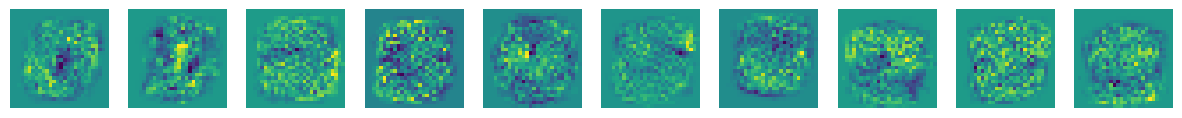

In [ ]:
fig,ax = plt.subplots(1,10,figsize=(15,6))
for i in range(10):
    ax[i].imshow(model.coef_[i].reshape(28,28))
    ax[i].axis('off')
plt.show()

## Кросс-валидация

Оценка устойчивости обученя модели.

In [ ]:
model = sk.linear_model.LogisticRegression(solver='newton-cg',tol=0.1)
scores = sk.model_selection.cross_val_score(model,X/255.0,Y,cv=5)
scores

array([0.92192857, 0.92128571, 0.91521429, 0.91828571, 0.92971429])